In [1]:
import numpy as np
import utils 

# Resampling 
### Resampling fatto a 192Khz in una nuova cartella mantenendo la struttura del dataset originale 
Vanno copiato i file di metadata nella nuova cartella?

In [ ]:
import librosa
import soundfile as sf
import os

def resample_audio_files(audio_files, target_sr, output_dir='resampled'):
    # Crea la directory di output se non esiste
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file in audio_files:
        # Carica il file audio
        y, sr = librosa.load(file, sr=None, mono=True)

        # Fai il resampling del segnale audio alla nuova frequenza di campionamento
        y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

        # Ottieni il percorso relativo del file
        relative_path = os.path.relpath(file, 'Dataset')

        # Crea la directory di output corrispondente se non esiste
        output_subdir = os.path.join(output_dir, os.path.dirname(relative_path))
        if not os.path.exists(output_subdir):
            os.makedirs(output_subdir)

        # Ottieni il nome del file senza l'estensione
        base_name = os.path.splitext(os.path.basename(file))[0]

        # Salva il segnale audio resampled nella directory di output come file WAV
        output_file = os.path.join(output_subdir, f'{base_name}_resampled.wav')
        sf.write(output_file, y_resampled, target_sr)

# Ottieni la lista dei file audio
audio_files_resampled = utils.get_audio_files('Dataset/df_paths.csv')

# Fai il resampling di tutti i file audio a 192kHz
resample_audio_files(audio_files_resampled, 192000)

In [3]:
df_paths, df_names = utils.create_dataframe_from_files("resampled")

In [5]:
#TODO: analisi per il resembling shannon Nyquist 
#TODO: da modificare --> non prendere i duplicati 
frequenciesTarget,frequenciesNonTarget = utils.get_frequencies('resampled/df_paths.csv')
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)


192000 192000
192000 192000


Files with 2 channels:


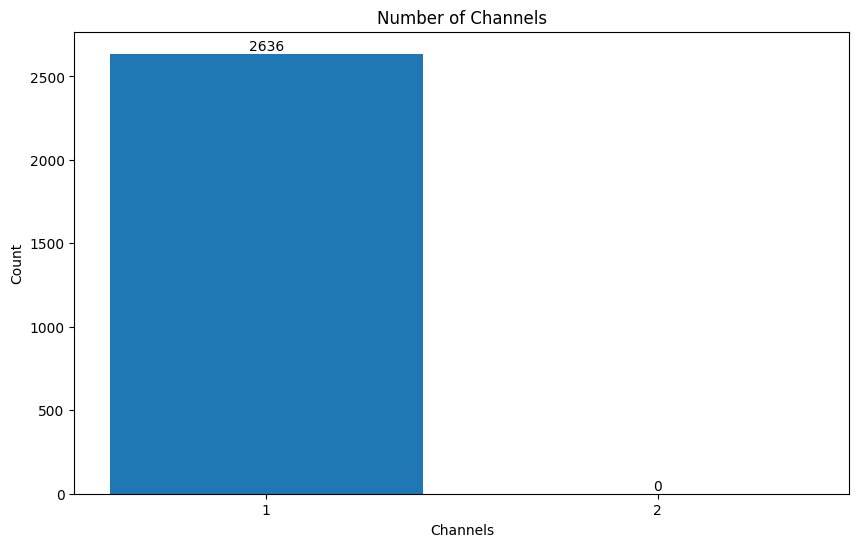

In [2]:

audio_files = utils.get_audio_files('resampled/df_paths.csv')
channels = utils.analyze_channels(audio_files)
utils.plot_channels(channels)

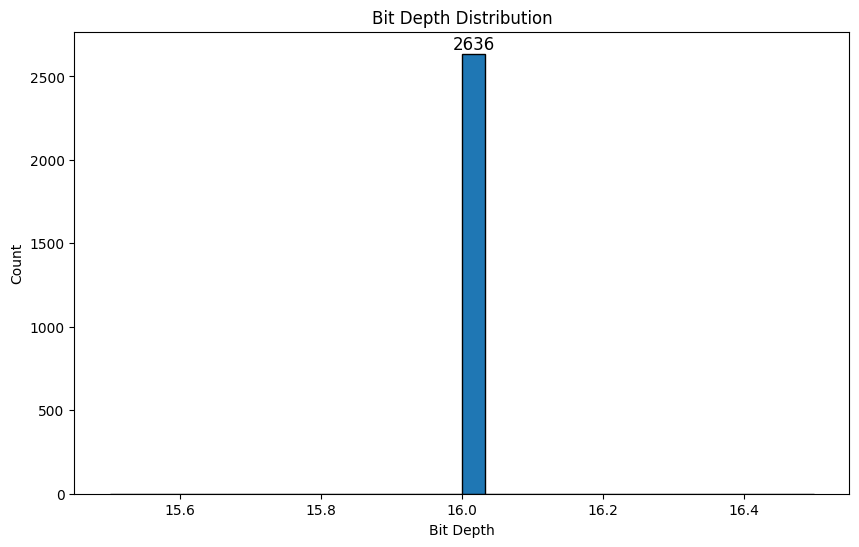

Totale skippati:  0
Totale campioni analizzati:  2636


In [4]:
import soundfile as sf
import matplotlib.pyplot as plt

import wave
import matplotlib.pyplot as plt


def analyze_and_plot_bit_depth(audio_files):
    bit_depths = []
    countskipped= 0
    totalChampions = 0
    for file in audio_files:
        if file.lower().endswith('.mp3'):  # Ignora i file .mp3
            continue
        try:
            with wave.open(file, 'rb') as wf:
                bit_depth = wf.getsampwidth() * 8  # Convert sample width to bit depth
                bit_depths.append(bit_depth)
                totalChampions = totalChampions + 1
        except:
            print(f"Could not process file {file}")
            countskipped = countskipped + 1
            continue

    # Crea un plot a barre della distribuzione delle bit depth
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(bit_depths, bins=30, edgecolor='black')
    plt.xlabel('Bit Depth')
    plt.ylabel('Count')
    plt.title('Bit Depth Distribution')

    # Aggiungi il numero di campioni per ogni classe
    bin_width = bins[1] - bins[0]  # Calculate the bin width

    for count, bin, patch in zip(counts, bins, patches):
        height = patch.get_height()
        if count > 0:
            plt.text(bin + bin_width/2, height * 1.01, str(int(count)), fontsize=12, ha='center')

    plt.show()

    #Stampa dei campioni
    print("Totale skippati: ",countskipped)
    print("Totale campioni analizzati: ", totalChampions)


# Utilizzo della funzione
audio_files = utils.get_audio_files('resampled/df_paths.csv')
analyze_and_plot_bit_depth(audio_files)